# pandas


Пакет для статистической обработки данных, по функциональности близкий к R.

In [9]:
import numpy as np
import pandas as pd

## Series

Одномерный набор данных. Отсутствующий данные записываются как `np.nan` (в этот день термометр сломался или метеоролог был пьян); они не участвуют в вычислении средних, среднеквадратичных отклонений и т.д.

In [10]:
l=[1,3,5,np.nan,6,8]
s=pd.Series(l)
s

0     1
1     3
2     5
3   NaN
4     6
5     8
dtype: float64


Основная информация о наборе данных: среднее, среднеквадратичное отклонение, минимум, максимум, медиана (которая отличается от среднего для несимметричных распределений).

In [11]:
s.describe()

count    5.000000
mean     4.600000
std      2.701851
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      8.000000
dtype: float64

Обычная индексация.

In [12]:
s[2]

5.0

In [13]:
s[2]=7
s

0     1
1     3
2     7
3   NaN
4     6
5     8
dtype: float64

In [14]:
s[2:5]

2     7
3   NaN
4     6
dtype: float64

In [15]:
s1=s[1:]
s1

1     3
2     7
3   NaN
4     6
5     8
dtype: float64

In [16]:
s2=s[:-1]
s2

0     1
1     3
2     7
3   NaN
4     6
dtype: float64


В сумме `s1+s2` складываются данные с одинаковыми индексами. Поскольку в `s1` нет данного и индексом 0, а в `s2` - с индексом 5, в `s1+s2` в соответствующих позициях будет `NaN`.

In [17]:
s1+s2

0   NaN
1     6
2    14
3   NaN
4    12
5   NaN
dtype: float64


К наборам данных можно применять функции из `numpy`.

In [18]:
np.exp(s)

0       2.718282
1      20.085537
2    1096.633158
3            NaN
4     403.428793
5    2980.957987
dtype: float64

При создании набора данных s мы не указали, что будет играть роль индекса. По умолчанию это последовательность целых чисел 0, 1, 2, ...

In [19]:
s.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')


Но можно создавать наборы данных с индексом, заданным списком.

In [20]:
i=list('abcdef')
i

['a', 'b', 'c', 'd', 'e', 'f']

In [21]:
s=pd.Series(l,index=i)
s

a     1
b     3
c     5
d   NaN
e     6
f     8
dtype: float64

In [22]:
s['c']

5.0

Если индекс - строка, то вместо s['c'] можно писать s.c.

In [23]:
s.c

5.0

Набор данных можно создать из словаря.

In [24]:
s=pd.Series({'a':1,'b':2,'c':0})
s

a    1
b    2
c    0
dtype: int64


Можно отсортировать набор данных.

In [25]:
s.sort_values()

c    0
a    1
b    2
dtype: int64

Роль индекса может играть, скажем, последовательность дат (или времён измерения и т.д.).

In [26]:
d=pd.date_range('20160101',periods=10)
d

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [27]:
s=pd.Series(np.random.normal(size=10),index=d)
s

2016-01-01   -1.559591
2016-01-02   -1.430883
2016-01-03    1.363134
2016-01-04    0.067828
2016-01-05   -0.440305
2016-01-06    0.285990
2016-01-07    0.029649
2016-01-08    0.258023
2016-01-09   -1.235827
2016-01-10   -0.593475
Freq: D, dtype: float64

Операции сравнения возвращают наборы булевых данных.

In [28]:
s>0

2016-01-01    False
2016-01-02    False
2016-01-03     True
2016-01-04     True
2016-01-05    False
2016-01-06     True
2016-01-07     True
2016-01-08     True
2016-01-09    False
2016-01-10    False
Freq: D, dtype: bool

Если такой булев набор использовать для индексации, получится поднабор только из тех данных, для которых условие есть True.

In [29]:
s[s>0]

2016-01-03    1.363134
2016-01-04    0.067828
2016-01-06    0.285990
2016-01-07    0.029649
2016-01-08    0.258023
dtype: float64

Кумулятивные максимумы - от первого элемента до текущего.

In [30]:
s.cummax()

2016-01-01   -1.559591
2016-01-02   -1.430883
2016-01-03    1.363134
2016-01-04    1.363134
2016-01-05    1.363134
2016-01-06    1.363134
2016-01-07    1.363134
2016-01-08    1.363134
2016-01-09    1.363134
2016-01-10    1.363134
Freq: D, dtype: float64


Кумулятивные суммы.

In [31]:
s=s.cumsum()
s

2016-01-01   -1.559591
2016-01-02   -2.990474
2016-01-03   -1.627340
2016-01-04   -1.559511
2016-01-05   -1.999816
2016-01-06   -1.713826
2016-01-07   -1.684177
2016-01-08   -1.426154
2016-01-09   -2.661981
2016-01-10   -3.255456
Freq: D, dtype: float64


Построим график.

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

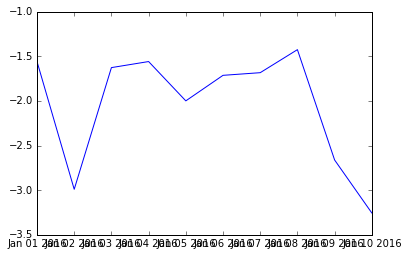

In [33]:
plt.plot(s)

## DataFrame

Двумерная таблица данных. Имеет индекс и набор столбцов (возможно, имеющих разные типы). Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [34]:
d={'one':pd.Series([1,2,3],index=['a','b','c']),
   'two':pd.Series([1,2,3,4],index=['a','b','c','d'])}
df=pd.DataFrame(d)
df

,one,two
a,1,1
b,2,2
c,3,3
d,NaN,4


In [35]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [36]:
df.columns

Index(['one', 'two'], dtype='object')

Если в качестве индекса указать имя столбца, получится одномерный набор данных.

In [37]:
df['one']

a     1
b     2
c     3
d   NaN
Name: one, dtype: float64

In [38]:
df.one

a     1
b     2
c     3
d   NaN
Name: one, dtype: float64

In [39]:
df['one']['c']

3.0


Однако если указать диапазон индексов, то это означает диапазон строк. Причём последняя строка включается в таблицу.

In [40]:
df['b':'d']

,one,two
b,2,2
c,3,3
d,NaN,4



Диапазон целых чисел даёт диапазон строк с такими номерами, не включая последнюю строку (как обычно при индексировании списков). Всё это кажется довольно нелогичным.

In [42]:
df[1:3]

,one,two
b,2,2
c,3,3



Логичнее работает атрибут `loc`: первая позиция - всегда индекс строки, а вторая - столбца.

In [43]:
df.loc['b']

one    2
two    2
Name: b, dtype: float64

In [44]:
df.loc['b','one']

2.0

In [45]:
df.loc['a':'b','one']

a    1
b    2
Name: one, dtype: float64

In [46]:
df.loc['a':'b',:]

,one,two
a,1,1
b,2,2


In [47]:
df.loc[:,'one']

a     1
b     2
c     3
d   NaN
Name: one, dtype: float64

К таблице можно добавлять новые столбцы.

In [48]:
df['three']=df['one']*df['two']
df['flag']=df['two']>2
df

,one,two,three,flag
a,1,1,1,False
b,2,2,4,False
c,3,3,9,True
d,NaN,4,NaN,True


Также можно удалять имеющиеся.

In [49]:
del df['two']
df['foo']=0.
df

,one,three,flag,foo
a,1,1,False,0
b,2,4,False,0
c,3,9,True,0
d,NaN,NaN,True,0



Добавим копию столбца `one`, в которую входят только строки до второй.

In [50]:
df['one_tr']=df['one'][:2]
df

,one,three,flag,foo,one_tr
a,1,1,False,0,1
b,2,4,False,0,2
c,3,9,True,0,NaN
d,NaN,NaN,True,0,NaN


In [52]:
df=df.loc[:,['one','one_tr']]
df

,one,one_tr
a,1,1
b,2,2
c,3,NaN
d,NaN,NaN


Можно объединять таблицы по вертикали и по горизонтали.

In [59]:
df2=pd.DataFrame({'one':{'e':0,'f':1},'one_tr':{'e':2}})
df2

,one,one_tr
e,0,2
f,1,NaN


In [60]:
pd.concat([df,df2])

,one,one_tr
a,1,1
b,2,2
c,3,NaN
d,NaN,NaN
e,0,2
f,1,NaN


In [61]:
df2=pd.DataFrame({'two':{'a':0,'b':1},'three':{'c':2,'d':3}})
df2

,three,two
a,NaN,0
b,NaN,1
c,2,NaN
d,3,NaN


In [62]:
pd.concat([df,df2],axis=1)

,one,one_tr,three,two
a,1,1,NaN,0
b,2,2,NaN,1
c,3,NaN,2,NaN
d,NaN,NaN,3,NaN



Создадим таблицу из массива случайных чисел.

In [63]:
df=pd.DataFrame(np.random.randn(10,4),
                columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.470684,-1.533963,0.735451,0.451547
1,-0.907528,1.206236,-1.250842,-0.867097
2,0.560748,1.803732,-1.652910,0.291583
3,-0.892442,-0.582841,-1.441132,-0.989534
4,-0.744113,1.850369,0.027012,-0.397162
5,-1.111270,-0.756095,0.535033,0.915821
6,-1.125516,1.879236,-0.816492,0.961301
7,-0.772418,0.690017,-1.168757,-2.117047
8,0.386806,0.220834,-0.573199,-1.008187
9,-0.236553,-0.235623,0.607441,-0.995972


In [64]:
df2=pd.DataFrame(np.random.randn(7,3),columns=['A','B','C'])
df+df2

,A,B,C,D
0,0.617191,-2.229776,2.752421,NaN
1,-1.304841,0.950946,-0.944665,NaN
2,0.077703,2.080569,-0.716896,NaN
3,0.742967,-0.033659,0.183463,NaN
4,-2.640383,1.776985,0.883887,NaN
5,-1.668494,-0.114070,1.171092,NaN
6,-0.123761,1.357788,-1.934635,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [65]:
2*df+3

,A,B,C,D
0,2.058632,-0.067926,4.470902,3.903093
1,1.184943,5.412473,0.498316,1.265806
2,4.121495,6.607464,-0.305820,3.583167
3,1.215116,1.834318,0.117736,1.020933
4,1.511773,6.700738,3.054024,2.205676
5,0.777460,1.487811,4.070065,4.831641
6,0.748968,6.758472,1.367016,4.922602
7,1.455164,4.380033,0.662485,-1.234093
8,3.773613,3.441668,1.853601,0.983627
9,2.526895,2.528755,4.214883,1.008056


In [66]:
np.sin(df)

,A,B,C,D
0,-0.453496,-0.999322,0.670922,0.436358
1,-0.787984,0.934281,-0.949250,-0.762454
2,0.531819,0.972993,-0.996631,0.287469
3,-0.778606,-0.550398,-0.991605,-0.835770
4,-0.677320,0.961173,0.027009,-0.386803
5,-0.896263,-0.686085,0.509869,0.793063
6,-0.902490,0.952808,-0.728748,0.819937
7,-0.697869,0.636550,-0.920265,-0.854478
8,0.377233,0.219044,-0.542323,-0.845866
9,-0.234353,-0.233449,0.570768,-0.839288


In [67]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.531297,0.454190,-0.499840,-0.375475
std,0.595436,1.222284,0.908800,1.001165
min,-1.125516,-1.533963,-1.652910,-2.117047
25%,-0.903757,-0.496036,-1.230321,-0.994363
50%,-0.758266,0.455425,-0.694846,-0.632130
75%,-0.295086,1.654358,0.408027,0.411556
max,0.560748,1.879236,0.735451,0.961301


In [68]:
df.sort_values(by='B')

,A,B,C,D
0,-0.470684,-1.533963,0.735451,0.451547
5,-1.111270,-0.756095,0.535033,0.915821
3,-0.892442,-0.582841,-1.441132,-0.989534
9,-0.236553,-0.235623,0.607441,-0.995972
8,0.386806,0.220834,-0.573199,-1.008187
7,-0.772418,0.690017,-1.168757,-2.117047
1,-0.907528,1.206236,-1.250842,-0.867097
2,0.560748,1.803732,-1.652910,0.291583
4,-0.744113,1.850369,0.027012,-0.397162
6,-1.125516,1.879236,-0.816492,0.961301


Атрибут iloc подобен loc: первый индекс - номер строки, второй - номер столбца. Это целые числа, конец диапазона на включается (как обычно в питоне).

In [69]:
df.iloc[2]

A    0.560748
B    1.803732
C   -1.652910
D    0.291583
Name: 2, dtype: float64

In [70]:
df.iloc[1:3]

,A,B,C,D
1,-0.907528,1.206236,-1.250842,-0.867097
2,0.560748,1.803732,-1.652910,0.291583


In [71]:
df.iloc[1:3,0:2]

,A,B
1,-0.907528,1.206236
2,0.560748,1.803732


кумулятивные суммы

In [72]:
cs=df.cumsum()
cs

,A,B,C,D
0,-0.470684,-1.533963,0.735451,0.451547
1,-1.378213,-0.327727,-0.515391,-0.415551
2,-0.817465,1.476005,-2.168301,-0.123967
3,-1.709907,0.893164,-3.609433,-1.113501
4,-2.454020,2.743533,-3.582421,-1.510663
5,-3.565290,1.987438,-3.047388,-0.594842
6,-4.690806,3.866674,-3.863880,0.366459
7,-5.463225,4.556691,-5.032638,-1.750588
8,-5.076418,4.777525,-5.605837,-2.758775
9,-5.312971,4.541902,-4.998396,-3.754747


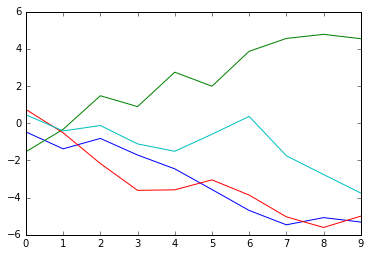

In [73]:
plt.plot(cs)